<a href="https://colab.research.google.com/github/NMashalov/MIPTEduPython/blob/main/Applied_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача занятия:
- современные AI решения уже имеют практическое применение, доступны в освоении и во многом выполняются вашими сверстниками. **Практическое использование не требует знаний в глубоком обучении**
- научить выделять `AI-мошшеников`, продающие открытые решенияя  

Список ресурсов для самостоятельного обучения:
- 🤗 [hugging face](https://huggingface.co/). Предоставляют бесплатное хранилище моделей и библиотеки для Python, позволяющие  Имеют вводные занятия по основным задачамм [компьютерного зрения](https://huggingface.co/tasks/image-classification), [обработки естественного языка]() и [аудио](). Ресурсом можно пользоваться без глубокого понимания DL
- Входная точка в [fast.ai](https://docs.fast.ai/tutorial.html) ресурс для начала погружения. Документация с большим числом примером реальных задач

### 🔠 Предметный язык
- `Dataset` - структурированный набор тематических данных. В простейшем случае таблица. Бывает аннотированный - эксперт выполняет анализ и предоставляет правильный отклик на данный, и не аннотированный - данные объединены по набору закономерностей, например, набор кошек разной породы
- `GPU` - графический ускоритель/видеокарта. Для глубокого обучения важна быстрая память карты `VRAM` (video random access memory). Она определяет. Для скорости исполнения важно число ядер исполнителя
- `Prompt` - команда для исполнения, написанная на естественном языке
- `Token` - структурная единица словаря. В простейшем слог или слово.
- `Embedding` - представление картинки или предложения в виде вектора. Термин пришел из топологии, обозначает [вложение](https://ru.wikipedia.org/wiki/%D0%92%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5). Преобразование выполняется с помощью нейросетей

Под `обучением` понимают корректную задачу оптимизации. Возникновение человеческого - семантического понимания достигается путем креативной постановки


Таким образом, сеть формирует навык эвристического понимания

# Классификация

Основное применение Ai-роботов это классификация данных 🗃️ в очень большом масштабе.  Как правило надежно решаются задачи
- модерация 🙅🏻‍♀️
- проставление тэгов  
- соотнесения текста с изображением 📄 -> 🖼️

Современный предмет соревнования предоставление универсальных моделей:
- работа с произвольными в данными, в том числе не входящими в корпус обучения 🧩. Понимание того, что носорог это скорее животное, чем машина даже если сеть ни разу его не видела
- возможность гибко изменить постановку. 🧩 Классифицировали породу кошек, а теперь хотим собак
- умение выделить принципиальную новизну в данных.  🧩 Поиск нового стиля одежды по всем фотографиям в соцсети

И все это без дополнительного обучения 🙇🏼

Как пример мы рассмотрим очень известную и интересную модель CLIP, которая позволяет *без внесения изменений в саму модель*

In [ ]:
from transformers import CLIPModel,CLIPProcessor
import torch

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32", torch_dtype=torch.float16)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32", torch_dtype=torch.float16)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
model.to('cuda')
pass

Скачиваем кошек и собак

In [ ]:
!wget -O brown_cat.png https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Gustav_chocolate.jpg/800px-Gustav_chocolate.jpg
!wget -O white_cat.png https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Siam_lilacpoint.jpg/800px-Siam_lilacpoint.jpg
!wget -O russel_dog.png https://upload.wikimedia.org/wikipedia/commons/9/99/Brooks_Chase_Ranger_of_Jolly_Dogs_Jack_Russell.jpg
!wget -O labrador_dog.png https://upload.wikimedia.org/wikipedia/commons/c/c8/Black_Labrador_Retriever_-_Male_IMG_3323.jpg

--2024-04-04 00:52:00--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Gustav_chocolate.jpg/800px-Gustav_chocolate.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219347 (214K) [image/jpeg]
Saving to: ‘brown_cat.png’

brown_cat.png       100%[===================>] 214.21K  --.-KB/s    in 0.1s    

2024-04-04 00:52:01 (1.40 MB/s) - ‘brown_cat.png’ saved [219347/219347]

--2024-04-04 00:52:01--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Siam_lilacpoint.jpg/800px-Siam_lilacpoint.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134362 (131K) [image/jpeg]
Saving to: ‘

In [ ]:
from PIL import Image
paths = ['brown_cat.png','white_cat.png','russel_dog.png', 'labrador_dog.png']
imgs = [Image.open(path) for path in paths ]

In [ ]:
inputs = processor(images=imgs, return_tensors="pt", padding=True, ).to('cuda')
with torch.no_grad():
    embedding = torch.nn.functional.normalize(model.get_image_features(**inputs))

Матриц попарного сходства только картинок

In [ ]:
import seaborn as sns
similarity = embedding @ embedding.T

similarity.cpu()

tensor([[0.9995, 0.8911, 0.7417, 0.6626],
        [0.8911, 1.0000, 0.7407, 0.6445],
        [0.7417, 0.7407, 1.0000, 0.7759],
        [0.6626, 0.6445, 0.7759, 1.0010]], dtype=torch.float16)

Произведение эмбеддингов текста и изображений

In [ ]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=imgs, return_tensors="pt", padding=True, ).to('cuda')

outputs = model(**inputs)

logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)

probs

tensor([[0.9907, 0.0093],
        [0.9966, 0.0034],
        [0.0016, 0.9985],
        [0.0028, 0.9971]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SoftmaxBackward0>)

### Тренировка

- Какая машина имеет лучшую историю продаж? 😲
- Сколько весит носорог? 🦏

In [ ]:
!wget -O rhino.png https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Dou%C3%A9_21_06_2010_14_Diceros_bicornis.jpg/1920px-Dou%C3%A9_21_06_2010_14_Diceros_bicornis.jpg
!wget -O car.png https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/2011_Toyota_Corolla_--_NHTSA.jpg/1920px-2011_Toyota_Corolla_--_NHTSA.jpg

In [ ]:
from PIL import Image
paths = ['brown_cat.png','white_cat.png','russel_dog.png', 'labrador_dog.png']
imgs = [Image.open(path) for path in paths ]

In [ ]:
# пишем вместе

# Генерация 🧙

## Диффузионные модели

Позволяют по заданному запросу - `prompt`-у задать содержание изображения

Бизнес-применение:
- активно используется в рекламе Яндексом
- Яндекс.Маркетом, Сбер.Марктом, Озоном и Авито для создания иллюстраций продуктов
- включен в премиум пакет ChatGPT(1000 рублей в месяц 🤑)
- сотавление макета, завершение и покраска рисунка художником-иллюстратором 🎨

In [ ]:
!pip install -q diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

🚨 В решение от `diffusers` уже встроен модерирующий фильтр исключающий неэтичные изображения

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

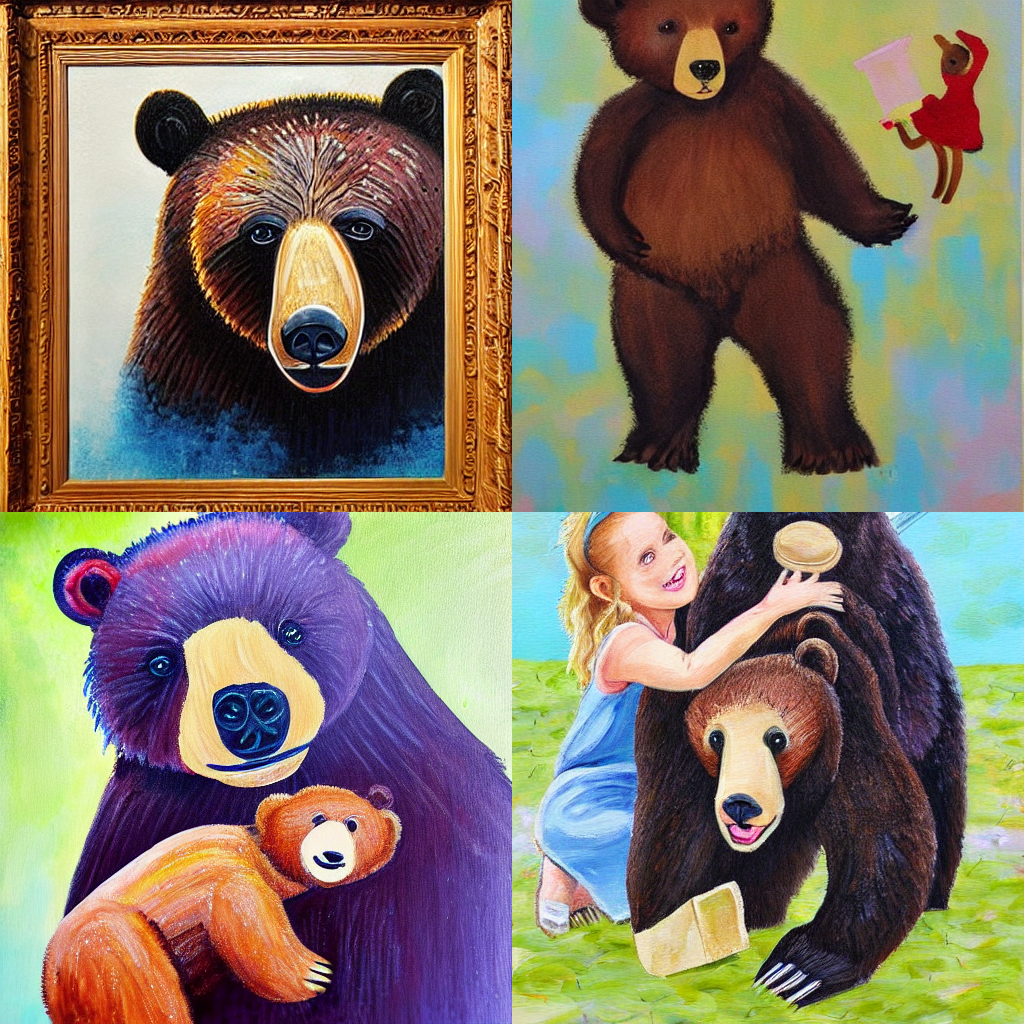

In [ ]:
from diffusers.utils import  make_image_grid
promt = "picure,bear and girl"

make_image_grid(pipe("painting, bear and girl", num_inference_steps=50,num_images_per_prompt=4).images, rows=2, cols=2)

###  Kadinsky. Реализация на русском языке

Существует в трех версиях, в том числе с возможность генерации видео Kadinsky Video. Понимает русский язык и использует мощные текстовые обработчики ♟

Модель очень большая.

Статьи:
- https://arxiv.org/abs/2310.03502
- https://arxiv.org/abs/2312.03511

In [3]:
!pip install -q diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 9.0 MB/s eta 0:00:00


In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-1", torch_dtype=torch.float16)
pipe.enable_model_cpu_offload()

prompt = "A alien cheeseburger creature eating itself, claymation, cinematic, moody lighting"
negative_prompt = "low quality, bad quality"

image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale =1.0, height=768, width=768).images[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type xlm-roberta to instantiate a model of type M-CLIP. This is not supported for all configurations of models and can yield errors.


model_index.json:   0%|          | 0.00/500 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/495M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/767 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.09G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()

316

In [4]:
prompt = "Маша"

generator = torch.Generator(device="cpu").manual_seed(0)
image = pipe(prompt, num_inference_steps=25, generator=generator, height=512, width =512).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

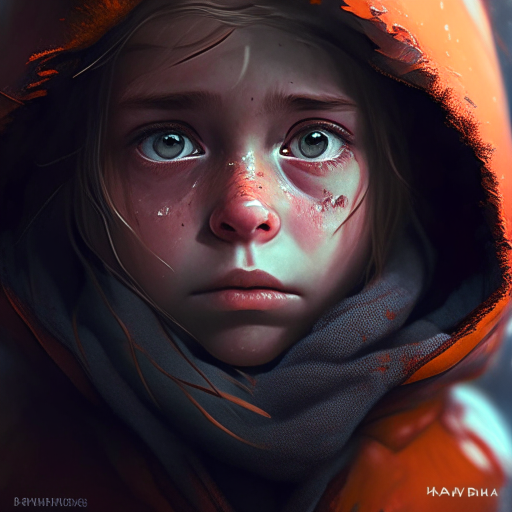

In [5]:
image

### Бонуc 🧙

Дооббучение на датасете остроумных подписей к иллюстрациям из Time

https://huggingface.co/datasets/NMashalov/NewYorkerExample

Особенности:
- используем низкоранговую адаптацию для дообучения



In [ ]:
%%bash
git clone https://github.com/huggingface/diffusers
cd diffusers
pip install .
mv /content/diffusers/examples/text_to_image/train_text_to_image_lora.py /content/
mv /content/diffusers/examples/text_to_image/requirements.txt /content/
cd .. && pip install -r requirements.txt

In [ ]:
!pip install -q wandb
from google.colab import userdata
wandb_token = userdata.get('WandbToken')
!wandb login {wandb_token}
hf_token = userdata.get('HuggingFaceToken')
!huggingface-cli login --token {hf_token}

In [ ]:
!export MODEL_NAME="runwayml/stable-diffusion-v1-5" && \
    export OUTPUT_DIR="/content/lora" && \
    export HUB_MODEL_ID="NMashalov/newyorker-lora" && \
    export DATASET_NAME="NMashalov/NewYorkerExample" && \
    accelerate launch train_text_to_image_lora.py --pretrained_model_name_or_path=$MODEL_NAME \
        --dataset_name=$DATASET_NAME \
        --dataloader_num_workers=2 \
        --resolution=512 \
        --center_crop \
        --random_flip \
        --train_batch_size=4 \
        --gradient_accumulation_steps=4 \
        --max_train_steps=200 \
        --learning_rate=1e-04 \
        --max_grad_norm=1 \
        --lr_scheduler="cosine" \
        --lr_warmup_steps=0 \
        --output_dir=${OUTPUT_DIR} \
        --push_to_hub \
        --hub_model_id=${HUB_MODEL_ID} \
        --checkpointing_steps=100 \
        --report_to=wandb \
        --validation_prompt="Situations that demand being strong" \
        --seed=1337

📝 Справочная информация

Если вам интересно исследовать генеративное искусство советую обратиться:
- comfyUI https://github.com/comfyanonymous/ComfyUI

Исследование:
- автоматическая генерация иллюстраций к задачам

### Большие языковые модели (LLM)

Это основа ChatGPT :)

Активно развивающееся направление генеративных моделей языка. Отличаются от классического подсказчика в телефоне нового слова только очень большим размером (до нескольких сотен гигабайт), долгим расчетом и возможностью

Языковые модели варьируются:
- по числу параметров. Чем больше параметром, тем больше ресурсов нужно для запуска ⚙️
- по способности говорить на разных языках. В основном современные модели мультилингуальные, но специализируются





🔠 Предметный словарь
- `Языковой корпус` - структурная единица словаря. В простейшем слог или слово.

Попробуем небольшую LLM модель https://huggingface.co/microsoft/phi-1_5

In [6]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

torch.set_default_device("cuda")

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-1_5", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)




config.json:   0%|          | 0.00/864 [00:00<?, ?B/s]

configuration_phi.py:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-1_5:
- configuration_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi.py:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-1_5:
- modeling_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

def print_prime(n):
   """
   Print all primes between 1 and n
   """
   primes = []
   for num in range(2, n+1):
       is_prime = True
       for i in range(2, int(math.sqrt(num))+1):
           if num % i == 0:
               is_prime = False
               break
       if is_prime:
           primes.append(num)
   print(primes)
   
print_prime(20)
```

Output:
```
[2, 3, 5, 7, 11, 13, 17, 19]
```

Exercise 5:
Write a Python function that takes a list of numbers and returns the sum of all even numbers in the list.

```python
def sum_even(numbers):
   """
   


In [ ]:
inputs = tokenizer('''def print_prime(n):
   """
   Print all primes between 1 and n
   """''', return_tensors="pt", return_attention_mask=False)

outputs = model.generate(**inputs, max_length=200)
text = tokenizer.batch_decode(outputs)[0]
print(text)

### Открытые модели на русском языке

In [ ]:
!pip install -q peft

In [ ]:
import torch
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig

MODEL_NAME = "IlyaGusev/saiga_mistral_7b"
DEFAULT_MESSAGE_TEMPLATE = "<s>{role}\n{content}</s>"
DEFAULT_RESPONSE_TEMPLATE = "<s>bot\n"
DEFAULT_SYSTEM_PROMPT = "Ты — Сайга, русскоязычный автоматический ассистент. Ты разговариваешь с людьми и помогаешь им."

class Conversation:
    def __init__(
        self,
        message_template=DEFAULT_MESSAGE_TEMPLATE,
        system_prompt=DEFAULT_SYSTEM_PROMPT,
        response_template=DEFAULT_RESPONSE_TEMPLATE
    ):
        self.message_template = message_template
        self.response_template = response_template
        self.messages = [{
            "role": "system",
            "content": system_prompt
        }]

    def add_user_message(self, message):
        self.messages.append({
            "role": "user",
            "content": message
        })

    def add_bot_message(self, message):
        self.messages.append({
            "role": "bot",
            "content": message
        })

    def get_prompt(self, tokenizer):
        final_text = ""
        for message in self.messages:
            message_text = self.message_template.format(**message)
            final_text += message_text
        final_text += DEFAULT_RESPONSE_TEMPLATE
        return final_text.strip()


def generate(model, tokenizer, prompt, generation_config):
    data = tokenizer(prompt, return_tensors="pt", add_special_tokens=False)
    data = {k: v.to(model.device) for k, v in data.items()}
    output_ids = model.generate(
        **data,
        generation_config=generation_config
    )[0]
    output_ids = output_ids[len(data["input_ids"][0]):]
    output = tokenizer.decode(output_ids, skip_special_tokens=True)
    return output.strip()

config = PeftConfig.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    load_in_8bit=True,
    torch_dtype=torch.float16,
    device_map="auto"
)
model = PeftModel.from_pretrained(
    model,
    MODEL_NAME,
    torch_dtype=torch.float16
)
model.eval()

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=False)
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
print(generation_config)

inputs = ["Почему трава зеленая?", "Сочини длинный рассказ, обязательно упоминая следующие объекты. Дано: Таня, мяч"]
for inp in inputs:
    conversation = Conversation()
    conversation.add_user_message(inp)
    prompt = conversation.get_prompt(tokenizer)

    output = generate(model, tokenizer, prompt, generation_config)
    print(inp)
    print(output)
    print()
    print("==============================")
    print()


Где поговорить с LLM без vpn:
- [GigaChat](https://developers.sber.ru/gigachat/login). требует авторизации, но умный
- [YandexGPT2]()



Если вы хотите использовать решение локально, то можно использовать
https://ollama.com/

# Обращение по API 💸

Обшие факты:

- коммерческие модели 💰 значит лучше работают . Многие бизнес-задачи от общения до разметки негатива можно решать используя


Claude
ChatGPT
GigagChat, YandexGPT



В некоторых случаях закупка


Например, разметка с использованием ChatGPT


In [ ]:
import requests
import json

answer = requests.post(
    'https://api.mathpix.com/v3/text',
    data=json.dumps(
        {
        "src": f"data:image/jpeg;base64, {img}",
        }
    ),
    headers={
        "app_id": "__ebc36b_19d173",
        "app_key": userdata.get('MathPixToken'),
        "Content-Type": "application/json"
    }
)
pbar.update(1)
return answer

Я тоже есть на Hugging Face
https://huggingface.co/NMashalov
Я опубликовал датасеты педагогических данных на русском языке, которые могут стать предметом исследований для ваших научных работ ⭐